In [1]:
#compare the CV values of czechowski et al 2005 (microarray) and those from the RNA-seq in Mergner et al 2020

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# def make_plot(df,x_variable, y_variable,x_label, y_label, output_prefix, plot_kind):
#     """function to make and save plot"""
#     #allow colour codes in seaborn
#     sns.set(color_codes=True)
#     sns.set_style("whitegrid")
#     #plot
#     plot = sns.catplot(x=x_variable, y=y_variable, data=df, kind=plot_kind)
#     #plot points
#     ax = sns.swarmplot(x=x_variable, y=y_variable, data=df, color=".25")
#     #change axes labels
#     plt.ylabel(y_label)
#     plt.xlabel(x_label)
#     #save figure
#     ax.get_figure().savefig(f'../../data/output/{file_names}/{dependent_variable}/plots/{output_prefix}_{plot_kind}.pdf', format='pdf')   

In [3]:
file_names = 'non-overlapping_includingbidirectional_all_genes_newannotation'
output_prefix = 'czechowski_co-oefficient_of_variation'


In [4]:
#make directory for the plots to be exported to
dirName = f'../../data/output/{file_names}/genes/plots'
try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName ,  " created") 
except FileExistsError:
    print("Directory " , dirName ,  " already exists")

Directory  ../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/plots  already exists


In [5]:
def all_prom_distribution(df, x_variable, x_label, df2=pd.DataFrame(),df1_label='', df2_label='', labels=False,
                          min_x_constitutive=False, max_x_constitutive=False,min_x_variable=False,max_x_variable=False, save=False):
    """function to return distribution plot of all promoters of variable of interest. 
    df1_label and df2 labels are the names of the respective gene type subset in the df"""
    #if only 1 dataframe provided then create just 1 plot
    if df2.empty:    
        dist_plot = df[x_variable]
        #create figure with no transparency
        dist_plot_fig = sns.distplot(dist_plot).get_figure()
        plt.xlabel(x_label)
    #else if 2 dataframes provided plot them on the same axes
    else:
        dist_plot1 = df[x_variable]
        dist_plot2 = df2[x_variable]
        dist_plot_fig = sns.distplot(dist_plot1,hist=False, rug=True,label=df1_label)
        sns.distplot(dist_plot2,hist=False, rug=True,label=df2_label).get_figure()
        #create legend
        plt.legend()
    if labels==True:
        #get axes
        ax = plt.axes()
        #constitutive annotation
        ax.annotate('top 100 constitutive range', xy=(max_x_constitutive, 0.2), xycoords='data', ha='left',
            xytext=(50, 100), textcoords='offset points',
                   arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.4', 
                            color='black'))
        ax.annotate('', xy=(max_x_constitutive, 0.2),
            xytext=(min_x_constitutive, 0.2),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2','color':'blue'})
        #Variable annotation
        ax.annotate('top 100 variable range', xy=(max_x_variable, 0.2), xycoords='data', ha='right',
            xytext=(0, -20), textcoords='offset points')
        ax.annotate('', xy=(max_x_variable, 0.2),
            xytext=(min_x_variable, 0.2),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2','color':'orange' })
        

    #save to file
    if save == True:
        dist_plot_fig.savefig(f'../../data/output/{file_names}/genes/plots/{output_prefix}_distribution.pdf', format='pdf')
    return dist_plot_fig

In [6]:
#location of files
czechowski = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_czechowski_constitutive_variable_random.txt'
czechowski_all = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_czechowski_allfilteredgenes.txt'
mergner = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_mergner_constitutive_variable_random.txt'
mergner_all = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_mergner_allfilteredgenes.txt'

In [7]:
#read in files to dfs
czechowski_df = pd.read_table(czechowski, sep='\t', header=None)
mergner_df = pd.read_table(mergner, sep='\t', header=None)
cols = ['AGI', 'gene_type']
czechowski_df.columns = cols
mergner_df.columns = cols

In [8]:
#read in all genes
czechowski_all_df = pd.read_table(czechowski_all, sep='\t', header=0)
mergner_all_df = pd.read_csv(mergner_all, sep='\t',header=0)

In [7]:
mergner_all_df

,chr,start,stop,AGI,dot1,strand,source,type,dot2,attributes,transcription_class,transcription_family,expression_CV,presence_in_araport11
0,1,30068518,30070022,AT1G79940,.,+,araport11,promoter,.,ID=gene:AT1G79940;Name=ERDJ2A;biotype=protein_...,NaN,NaN,0.181119,1.0
1,3,18488381,18489450,AT3G49850,.,+,araport11,promoter,.,ID=gene:AT3G49850;Name=TRB3;biotype=protein_co...,TF,MYB-related,0.211639,1.0
2,1,20186824,20188096,AT1G54080,.,-,araport11,promoter,.,ID=gene:AT1G54080;Name=UBP1A;biotype=protein_c...,NaN,NaN,0.214741,1.0
3,1,28630789,28631403,AT1G76320,.,+,araport11,promoter,.,ID=gene:AT1G76320;Name=FRS4;biotype=protein_co...,TF,FAR1,0.215190,1.0
4,3,5455942,5456512,AT3G16090,.,+,araport11,promoter,.,ID=gene:AT3G16090;Name=HRD1A;biotype=protein_c...,NaN,NaN,0.216473,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16459,5,16177731,16178731,AT5G40430,.,-,araport11,promoter,.,ID=gene:AT5G40430;Name=MYB22;biotype=protein_c...,TF,MYB,5.385165,1.0
16460,1,13152582,13153582,AT1G35617,.,+,araport11,promoter,.,ID=gene:AT1G35617;biotype=protein_coding;descr...,NaN,NaN,5.385165,1.0
16461,3,8286941,8287968,AT3G23220,.,+,araport11,promoter,.,ID=gene:AT3G23220;Name=ERF095;biotype=protein_...,TF,AP2/ERF-ERF,5.385165,1.0
16462,5,21525713,21526249,AT5G53100,.,+,araport11,promoter,.,ID=gene:AT5G53100;biotype=protein_coding;descr...,NaN,NaN,5.385165,1.0


In [8]:
#how many constitutive genes in both mergner and czechowski constitutive sets?
inboth = czechowski_df[czechowski_df.AGI.isin(mergner_df.AGI)]
len(inboth[inboth.gene_type == 'constitutive'])

14

In [9]:
#how many variable genes in both mergner and czechowski constitutive sets?
len(inboth[inboth.gene_type == 'variable'])

2

In [10]:
#how many control genes in both mergner and czechowski constitutive sets?
len(inboth[inboth.gene_type == 'random'])

0

In [11]:
mergner_df

,AGI,gene_type
0,AT1G79940,constitutive
1,AT3G49850,constitutive
2,AT1G54080,constitutive
3,AT1G76320,constitutive
4,AT3G16090,constitutive
...,...,...
295,AT3G10460,control
296,AT1G05580,control
297,AT5G23270,control
298,AT5G60070,control


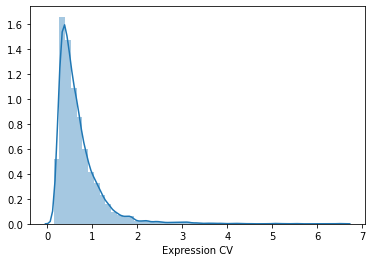

In [12]:
#all czechowski CV distribution plot
all_prom_distribution(czechowski_all_df,'expression_CV', 'Expression CV')

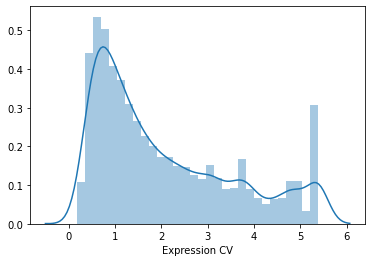

In [13]:
#all mergner CV distribution plot
all_prom_distribution(mergner_all_df,'expression_CV', 'Expression CV')

In [14]:
#plot CV from RNA-seq for top variable and top constitutive genes from microarray'
merged = pd.merge(czechowski_df,mergner_all_df, on='AGI', how='left')

/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


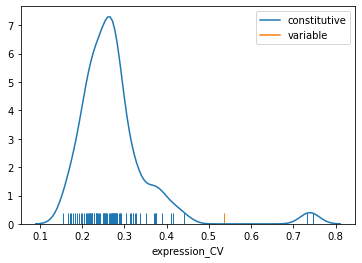

In [15]:
#using CVs from RNA-seq for top variable and top constitutive genes from microarray'
#plot microarray constitutive gene CVs and plot variable CVs
#merge dfs
merged2 = pd.merge(mergner_df,czechowski_all_df, on='AGI', how='left')
#ONLY 134 GENES FROM RNA-SEQ SET ARE IN THE MICROARRAY SET
#86 constitutive genes from RNA-seq in microarray
#1 variable genes from RNA-seq in microarray
#47 control genes from RNA-seq in microarray
all_prom_distribution(merged2[merged2.gene_type == 'constitutive'],'expression_CV', 'Expression CV', merged2[merged2.gene_type == 'variable'], df1_label='constitutive',df2_label='variable')

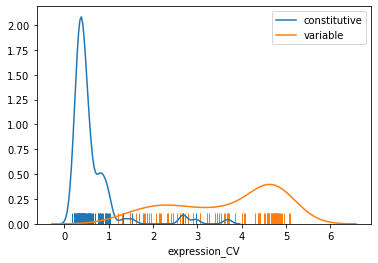

In [16]:
#using CVs from microarray for top variable and top constitutive genes from RNA-seq'
#plot microarray constitutive gene CVs and plot variable CVs
all_prom_distribution(merged[merged.gene_type == 'constitutive'],'expression_CV', 'Expression CV', merged[merged.gene_type == 'variable'], df1_label='constitutive',df2_label='variable')
#Indeed constitutive genes set from the microarray have lower RNA-seq CVs than variable gene set

<AxesSubplot:xlabel='expression_CV'>

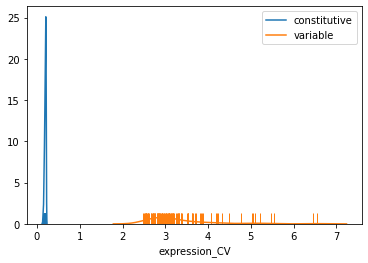

In [10]:
#czechovski CV distribution
#using CVs and gene categories from only the microarray, plot CVs of the constitutive and variable gene sets
merged_czechowski =pd.merge(czechowski_df,czechowski_all_df, on='AGI', how='left')
all_prom_distribution(merged_czechowski[merged_czechowski.gene_type == 'constitutive'],'expression_CV', 'Expression CV',merged_czechowski[merged_czechowski.gene_type == 'variable'],df1_label='constitutive',df2_label='variable')

/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


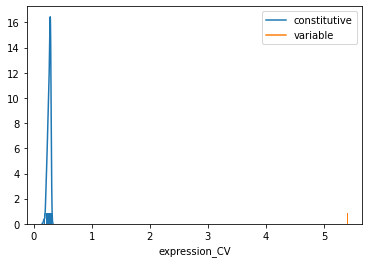

In [18]:
#mergner CV distribution
#using CVs and gene categories from only the RNA-seq data, plot CVs of the constitutive and variable gene sets
merged_mergner =pd.merge(mergner_df,mergner_all_df, on='AGI', how='left')
all_prom_distribution(merged_mergner[merged_mergner.gene_type == 'constitutive'],'expression_CV', 'Expression CV',merged_mergner[merged_mergner.gene_type == 'variable'],df1_label='constitutive',df2_label='variable')
#all variable genes have a CV of 5.385165

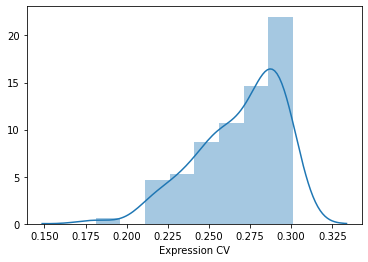

In [19]:
#distribution of only constitutive gene CVs (both gene categories and CVs from RNA-seq data)
all_prom_distribution(merged_mergner[merged_mergner.gene_type == 'constitutive'],'expression_CV', 'Expression CV')

/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


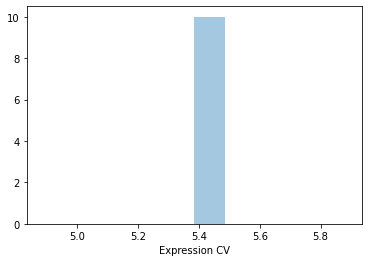

In [20]:
#distribution of only variable gene CVs (both gene categories and CVs from RNA-seq data)
all_prom_distribution(merged_mergner[merged_mergner.gene_type == 'variable'],'expression_CV', 'Expression CV')
#all variable genes have a CV of 5.385165

In [24]:
#Czechowski top 100 constitutive & variable genes
merged_czechowski[~(merged_czechowski.gene_type == 'control')]

,AGI,gene_type,chr,start,stop,dot1,strand,source,type,dot2,attributes,rank,probe_id,expression_mean,expression_SD,expression_CV,proportion_of_values_present_in_mas5,presence_in_araport11,constitutive_in_araport11
0,AT4G34270,constitutive,4,16406153,16406940,.,-,araport11,promoter,.,ID=gene:AT4G34270;Name=TIP41L;biotype=protein_...,1.0,253287_at,353.456602,49.857754,0.141058,89.0,1.0,0.0
1,AT4G33380,constitutive,4,16071405,16072063,.,+,araport11,promoter,.,ID=gene:AT4G33380;biotype=protein_coding;descr...,2.0,253355_at,310.079363,44.656095,0.144015,100.0,1.0,0.0
2,AT2G28390,constitutive,2,12143375,12144665,.,-,araport11,promoter,.,ID=gene:AT2G28390;Name=MON1;biotype=protein_co...,5.0,265256_at,415.473770,64.144394,0.154389,99.0,1.0,0.0
3,AT1G71820,constitutive,1,27008563,27010021,.,+,araport11,promoter,.,ID=gene:AT1G71820;Name=SEC6;biotype=protein_co...,6.0,261520_at,404.220936,64.348116,0.159190,100.0,1.0,0.0
4,AT1G48900,constitutive,1,18087743,18088934,.,-,araport11,promoter,.,ID=gene:AT1G48900;Name=SRP-54C;biotype=protein...,8.0,246628_at,1092.834323,175.242466,0.160356,100.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,AT5G45840,variable,5,18597221,18598907,.,-,araport11,promoter,.,ID=gene:AT5G45840;biotype=protein_coding;gene_...,12040.0,248916_at,134.581901,703.490627,5.227231,87.0,1.0,0.0
196,AT5G16100,variable,5,5259719,5260521,.,-,araport11,promoter,.,ID=gene:AT5G16100;biotype=protein_coding;descr...,12042.0,246491_at,58.005668,317.123112,5.467106,96.0,1.0,0.0
197,AT3G44070,variable,3,15829478,15830823,.,-,araport11,promoter,.,ID=gene:AT3G44070;biotype=protein_coding;descr...,12044.0,252663_at,43.870893,243.328949,5.546478,92.0,1.0,0.0
198,AT3G60570,variable,3,22390152,22391246,.,+,araport11,promoter,.,ID=gene:AT3G60570;Name=EXPB5;biotype=protein_c...,12045.0,251397_at,136.318970,881.245110,6.464582,85.0,1.0,0.0


In [26]:
#highest CV constitutive
merged_czechowski[merged_czechowski.gene_type == 'constitutive'].expression_CV.max()

0.2126662631755038

In [27]:
#lowest CV variable
merged_czechowski[merged_czechowski.gene_type == 'variable'].expression_CV.min()

2.4864757213875044

/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


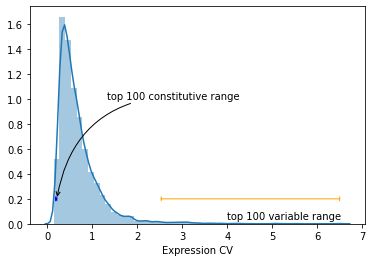

In [11]:
#all czechowski CV distribution plot with annotation showing top 100 constitutive and top 100 variable
dist_plot_fig = all_prom_distribution(czechowski_all_df,'expression_CV', 'Expression CV',
                                      labels=True,min_x_constitutive=merged_czechowski[merged_czechowski.gene_type == 'constitutive'].expression_CV.min(),
                                      max_x_constitutive=merged_czechowski[merged_czechowski.gene_type == 'constitutive'].expression_CV.max(),
                                     min_x_variable=merged_czechowski[merged_czechowski.gene_type == 'variable'].expression_CV.min(),
                                     max_x_variable=merged_czechowski[merged_czechowski.gene_type == 'variable'].expression_CV.max(),save=True)


In [49]:
merged_czechowski[merged_czechowski.gene_type == 'constitutive'].expression_CV.min()

0.14105764030744095

In [64]:
merged_czechowski[merged_czechowski.gene_type == 'constitutive'].expression_CV.max()

0.2126662631755038

### identify how many promoters potentially bidirectional in each promoter category (potentially overlapping promoters where the upstream gene was positioned in the opposite direction and was less than 2000 bp away from the TSS.)

In [126]:
overlapping_promoters_bed = f'../../data/output/{file_names}/overlapping_promoters.bed'
overlappingproms_df = pd.read_table(overlapping_promoters_bed, sep='\t',header=None)
cols = ['chr', 'start', 'stop', 'numberoverlapping', 'gene1','gene2']
overlappingproms_df.columns = cols
#select genes present in both czechowski gene set and overlapping
czechowski_overlappingproms = czechowski_df[czechowski_df.AGI.isin(overlappingproms_df.gene1) | czechowski_df.AGI.isin(overlappingproms_df.gene2)]


In [129]:
len(czechowski_overlappingproms[czechowski_overlappingproms.gene_type == 'constitutive'])

37

In [131]:
len(czechowski_overlappingproms[czechowski_overlappingproms.gene_type == 'variable'])

13

In [132]:
len(czechowski_overlappingproms[czechowski_overlappingproms.gene_type == 'control'])

23